# Welcome To Software Engineering Practices Part I
In this lesson, you'll learn about the following practices of software engineering and how they apply in data science.

- Writing clean and modular code
- Writing efficient code
- Code refactoring
- Adding meaningful documentation
- Using version control

In the lesson following this one (Part II) you'll also learn these software engineering practices:

- Testing
- Logging
- Code reviews

## Clean and Modular Code
- **PRODUCTION CODE**: software running on production servers to handle live users and data of the intended audience. Note this is different from production quality code, which describes code that meets expectations in reliability, efficiency, etc., for production. Ideally, all code in production meets these expectations, but this is not always the case.
- **CLEAN**: readable, simple, and concise. A characteristic of production quality code that is crucial for collaboration and maintainability in software development.
- **MODULAR**: logically broken up into functions and modules. Also an important characteristic of production quality code that makes your code more organized, efficient, and reusable.
- **MODULE**: a file. Modules allow code to be reused by encapsulating them into files that can be imported into other files.

## Refactoring Code
- **REFACTORING**: restructuring your code to improve its internal structure, without changing its external functionality. This gives you a chance to clean and modularize your program after you've got it working.
- Since it isn't easy to write your best code while you're still trying to just get it working, allocating time to do this is essential to producing high quality code. Despite the initial time and effort required, this really pays off by speeding up your development time in the long run.
- You become a much stronger programmer when you're constantly looking to improve your code. The more you refactor, the easier it will be to structure and write good code the first time.

## Writing Clean Code: Meaningful Names
Tip: Use meaningful names
- Be descriptive and imply type - E.g. for booleans, you can prefix with is_ or has_ to make it clear it is a condition. You can also use part of speech to imply types, like verbs for functions and nouns for variables.
- Be consistent but clearly differentiate - E.g. age_list and age is easier to differentiate than ages and age.
- Avoid abbreviations and especially single letters - (Exception: counters and common math variables) Choosing when these exceptions can be made can be determined based on the audience for your code. If you work with other data scientists, certain variables may be common knowledge. While if you work with full stack engineers, it might be necessary to provide more descriptive names in these cases as well.
- Long names != descriptive names - You should be descriptive, but only with relevant information. E.g. good functions names describe what they do well without including details about implementation or highly specific uses.

Try testing how effective your names are by asking a fellow programmer to guess the purpose of a function or variable based on its name, without looking at your code. Coming up with meaningful names often requires effort to get right.

## Writing Clean Code: Nice Whitespace
Tip: Use whitespace properly
- Organize your code with consistent indentation - the standard is to use 4 spaces for each indent. You can make this a default in your text editor.
- Separate sections with blank lines to keep your code well organized and readable.
- Try to limit your lines to around 79 characters, which is the guideline given in the PEP 8 style guide. In many good text editors, there is a setting to display a subtle line that indicates where the 79 character limit is.

For more guidelines, check out the code layout section of PEP 8 in the notes below.

## Writing Clean Code: Nice Whitespace
[PEP 8 guidelines for code layout](https://www.python.org/dev/peps/pep-0008/?#code-lay-out)

In [ ]:
# before
t = end_time - start  # compute execution time
c = category(t)  # get category of task
print('Task Duration: {} seconds, Category: {}'.format(t, c)

# after
execution_time = end_time - start_time
category = categorize_task(execution_time)
print('Task Duration: {} seconds, Category: {}'.format(execution_time, category)

## Writing Modular Code
- Tip: DRY (Don't Repeat Yourself)

Don't repeat yourself! Modularization allows you to reuse parts of your code. Generalize and consolidate repeated code in functions or loops.

- Tip: Abstract out logic to improve readability

Abstracting out code into a function not only makes it less repetitive, but also improves readability with descriptive function names. Although your code can become more readable when you abstract out logic into functions, it is possible to over-engineer this and have way too many modules, so use your judgement.

- Tip: Minimize the number of entities (functions, classes, modules, etc.)

There are tradeoffs to having function calls instead of inline logic. If you have broken up your code into an unnecessary amount of functions and modules, you'll have to jump around everywhere if you want to view the implementation details for something that may be too small to be worth it. Creating more modules doesn't necessarily result in effective modularization.

- Tip: Functions should do one thing

Each function you write should be focused on doing one thing. If a function is doing multiple things, it becomes more difficult to generalize and reuse. Generally, if there's an "and" in your function name, consider refactoring.

- Tip: Arbitrary variable names can be more effective in certain functions

Arbitrary variable names in general functions can actually make the code more readable.

- Tip: Try to use fewer than three arguments per function

Try to use no more than three arguments when possible. This is not a hard rule and there are times it is more appropriate to use many parameters. But in many cases, it's more effective to use fewer arguments. Remember we are modularizing to simplify our code and make it more efficient to work with. If your function has a lot of parameters, you may want to rethink how you are splitting this up.

### Refactor: Wine Quality Analysis
In this exercise, you'll refactor code that analyzes a wine quality dataset taken from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/wine+quality). Each row contains data on a wine sample, including several physicochemical properties gathered from tests, as well as a quality rating evaluated by wine experts.

The code in this notebook first renames the columns of the dataset and then calculates some statistics on how some features may be related to quality ratings. Can you refactor this code to make it more clean and modular?

In [1]:
import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Renaming Columns
You want to replace the spaces in the column labels with underscores to be able to reference columns with dot notation. Here's one way you could've done it.

In [2]:
new_df = df.rename(columns={'fixed acidity': 'fixed_acidity',
                             'volatile acidity': 'volatile_acidity',
                             'citric acid': 'citric_acid',
                             'residual sugar': 'residual_sugar',
                             'free sulfur dioxide': 'free_sulfur_dioxide',
                             'total sulfur dioxide': 'total_sulfur_dioxide'
                            })
new_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


And here's a slightly better way you could do it. You can avoid making naming errors due to typos caused by manual typing. However, this looks a little repetitive. Can you make it better?

In [ ]:
labels = list(df.columns)
labels[0] = labels[0].replace(' ', '_')
labels[1] = labels[1].replace(' ', '_')
labels[2] = labels[2].replace(' ', '_')
labels[3] = labels[3].replace(' ', '_')
labels[5] = labels[5].replace(' ', '_')
labels[6] = labels[6].replace(' ', '_')
df.columns = labels

df.head()

In [9]:
df.columns = [label.replace(' ','_') for label in list(df.columns)]

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,low,low,0.076,11.0,34.0,0.9978,high,0.56,low,5
1,7.8,0.88,low,high,0.098,25.0,67.0,0.9968,low,0.68,low,5
2,7.8,0.76,low,high,0.092,15.0,54.0,0.9970,low,0.65,low,5
3,11.2,0.28,high,low,0.075,17.0,60.0,0.9980,low,0.58,low,6
4,7.4,0.70,low,low,0.076,11.0,34.0,0.9978,high,0.56,low,5


### Analyzing Features
Now that your columns are ready, you want to see how different features of this dataset relate to the quality rating of the wine. A very simple way you could do this is by observing the mean quality rating for the top and bottom half of each feature. The code below does this for four features. It looks pretty repetitive right now. Can you make this more concise? 

You might challenge yourself to figure out how to make this code more efficient! But you don't need to worry too much about efficiency right now - we will cover that more in the next section.

In [ ]:
median_alcohol = df.alcohol.median()
for i, alcohol in enumerate(df.alcohol):
    if alcohol >= median_alcohol:
        df.loc[i, 'alcohol'] = 'high'
    else:
        df.loc[i, 'alcohol'] = 'low'
df.groupby('alcohol').quality.mean()

In [ ]:
median_pH = df.pH.median()
for i, pH in enumerate(df.pH):
    if pH >= median_pH:
        df.loc[i, 'pH'] = 'high'
    else:
        df.loc[i, 'pH'] = 'low'
df.groupby('pH').quality.mean()

In [ ]:
median_sugar = df.residual_sugar.median()
for i, sugar in enumerate(df.residual_sugar):
    if sugar >= median_sugar:
        df.loc[i, 'residual_sugar'] = 'high'
    else:
        df.loc[i, 'residual_sugar'] = 'low'
df.groupby('residual_sugar').quality.mean()

In [ ]:
median_citric_acid = df.citric_acid.median()
for i, citric_acid in enumerate(df.citric_acid):
    if citric_acid >= median_citric_acid:
        df.loc[i, 'citric_acid'] = 'high'
    else:
        df.loc[i, 'citric_acid'] = 'low'
df.groupby('citric_acid').quality.mean()

In [7]:
def get_top_bottom_mean(df,col):
    median_col = df[col].median()
    for i, val in enumerate(df[col]):
        if val >= median_col:
            df.loc[i,col] = 'high'
        else:
            df.loc[i,col] = 'low'
    return(df.groupby(col).quality.mean())

for col in ['alcohol','pH','residual_sugar','citric_acid']:
    print(get_top_bottom_mean(df,col))
        

alcohol
high    5.958904
low     5.310302
Name: quality, dtype: float64
pH
high    5.598039
low     5.675607
Name: quality, dtype: float64
residual_sugar
high    5.665880
low     5.602394
Name: quality, dtype: float64
citric_acid
high    5.822360
low     5.447103
Name: quality, dtype: float64


## Efficient Code
Knowing how to write code that runs efficiently is another essential skill in software development. Optimizing code to be more efficient can mean making it:

- Execute faster
- Take up less space in memory/storage

The project you're working on would determine which of these is more important to optimize for your company or product. When we are performing lots of different transformations on large amounts of data, this can make orders of magnitudes of difference in performance.

# Optimizing Code: Common Books
Here's the code your coworker wrote to find the common book ids in `books_published_last_two_years.txt` and `all_coding_books.txt` to obtain a list of recent coding books.

In [10]:
import time
import pandas as pd
import numpy as np

In [11]:
with open('books_published_last_two_years.txt') as f:
    recent_books = f.read().split('\n')
    
with open('all_coding_books.txt') as f:
    coding_books = f.read().split('\n')

In [12]:
start = time.time()
recent_coding_books = []

for book in recent_books:
    if book in coding_books:
        recent_coding_books.append(book)

print(len(recent_coding_books))
print('Duration: {} seconds'.format(time.time() - start))

96
Duration: 11.858199119567871 seconds


### Tip #1: Use vector operations over loops when possible

Use numpy's `intersect1d` method to get the intersection of the `recent_books` and `coding_books` array

In [13]:
start = time.time()
recent_coding_books =  np.intersect1d(recent_books,coding_books)
print(len(recent_coding_books))
print('Duration: {} seconds'.format(time.time() - start))

96
Duration: 0.06850981712341309 seconds


### Tip #2: Know your data structures and which methods are faster
Use the set's `intersection` method to get the common elements in `recent_books` and `coding_books`.

In [14]:
start = time.time()
recent_coding_books =  set(recent_books)&set(coding_books)
print(len(recent_coding_books))
print('Duration: {} seconds'.format(time.time() - start))

96
Duration: 0.008656978607177734 seconds


# Optimizing Code: Holiday Gifts
In the last example, you learned that using vectorized operations and more efficient data structures can optimize your code. Let's use these tips for one more example.

Say your online gift store has one million users that each listed a gift on a wish list. You have the prices for each of these gifts stored in `gift_costs.txt`. For the holidays, you're going to give each customer their wish list gift for free if it is under 25 dollars. Now, you want to calculate the total cost of all gifts under 25 dollars to see how much you'd spend on free gifts. Here's one way you could've done it.

In [15]:
import time
import numpy as np

In [16]:
with open('gift_costs.txt') as f:
    gift_costs = f.read().split('\n')
    
gift_costs = np.array(gift_costs).astype(int)  # convert string to int

In [20]:
start = time.time()

total_price = 0
for cost in gift_costs:
    if cost < 25:
        total_price += cost * 1.08  # add cost after tax

print(total_price)
print('Duration: {} seconds'.format(time.time() - start))

32765421.23999867
Duration: 8.380846977233887 seconds


Here you iterate through each cost in the list, and check if it's less than 25. If so, you add the cost to the total price after tax. This works, but there is a much faster way to do this. Can you refactor this to run under half a second?

## Refactor Code
**Hint:** Using numpy makes it very easy to select all the elements in an array that meet a certain condition, and then perform operations on them together all at once. You can them find the sum of what those values end up being.

In [26]:
start = time.time()

total_price =  (gift_costs[gift_costs<25]*1.08).sum()

print(total_price)
print('Duration: {} seconds'.format(time.time() - start))

32765421.240000006
Duration: 0.08664608001708984 seconds


## Documentation
- **DOCUMENTATION**: additional text or illustrated information that comes with or is embedded in the code of software.
- *Helpful for clarifying complex parts of code, making your code easier to navigate, and quickly conveying how and why different components of your program are used.
- Several types of documentation can be added at different levels of your program:
    - **In-line Comments** - line level
    - **Docstrings** - module and function level
    - **Project Documentation** - project level

## In-Line Comments
- In-line comments are text following hash symbols throughout your code. They are used to explain parts of your code, and really help future contributors understand your work.
- One way comments are used is to document the major steps of complex code to help readers follow. Then, you may not have to understand the code to follow what it does. However, others would argue that this is using comments to justify bad code, and that if code requires comments to follow, it is a sign refactoring is needed.
- Comments are valuable for explaining where code cannot. For example, the history behind why a certain method was implemented a specific way. Sometimes an unconventional or seemingly arbitrary approach may be applied because of some obscure external variable causing side effects. These things are difficult to explain with code.

## Docstrings
Docstring, or documentation strings, are valuable pieces of documentation that explain the functionality of any function or module in your code. Ideally, each of your functions should always have a docstring.

Docstrings are surrounded by triple quotes. The first line of the docstring is a brief explanation of the function's purpose.

### One line docstring
`
def population_density(population, land_area):
    """Calculate the population density of an area."""
    return population / land_area`
    
If you think that the function is complicated enough to warrant a longer description, you can add a more thorough paragraph after the one line summary.

### Multi line docstring
`
def population_density(population, land_area):
    """Calculate the population density of an area.

    Args:
    population: int. The population of the area
    land_area: int or float. This function is unit-agnostic, if you
    pass in values in terms of square km or square miles the function
    will return a density in those units.

    Returns:
    population_density: population/land_area. The population density 
    of a particular area.
    """
    return population / land_area
`

The next element of a docstring is an explanation of the function's arguments. Here you list the arguments, state their purpose, and state what types the arguments should be. Finally it is common to provide some description of the output of the function. Every piece of the docstring is optional; however, doc strings are a part of good coding practice.

### Resources:
- [PEP 257 - Docstring Conventions](https://www.python.org/dev/peps/pep-0257/)
- [NumPy Docstring Guide](https://numpydoc.readthedocs.io/en/latest/format.html)


In [31]:
def foo():
    """This is the
     second line of the docstring.
    """

In [32]:
foo.__doc__

'This is the\n     second line of the docstring.\n    '

## Project Documentation
Project documentation is essential for getting others to understand why and how your code is relevant to them, whether they are potentials users of your project or developers who may contribute to your code. A great first step in project documentation is your README file. It will often be the first interaction most users will have with your project.

Whether it's an application or a package, your project should absolutely come with a README file. At a minimum, this should explain what it does, list its dependencies, and provide sufficiently detailed instructions on how to use it. You want to make it as simple as possible for others to understand the purpose of your project, and quickly get something working.

Translating all your ideas and thoughts formally on paper can be a little difficult, but you'll get better over time and makes a significant difference in helping others realize the value of your project. Writing this documentation can also helps you improve the design of your code, as you're forced to think through your design decisions more thoroughly. This also allows future contributors to know how to follow your original intentions.

Recall the README examples you've seen in the previous lesson on Communicating to Stakeholders.

## Version control in data science
## Scenario #1
Let's walk through the git commands that go along with each step in the scenario you just observed in the video above.

- STEP 1: You have a local version of this repository on your laptop, and to get the latest stable version, you pull from the develop branch.

Switch to the develop branch

`git checkout develop`

Pull latest changes in the develop branch

`git pull`

- STEP 2: When you start working on this demographic feature, you create a new branch for this called demographic, and start working on your code in this branch.

Create and switch to new branch called demographic from develop branch

`git checkout -b demographic`

Work on this new feature and commit as you go

`git commit -m 'added gender recommendations'`

`git commit -m 'added location specific recommendations'`

...

- STEP 3: However, in the middle of your work, you need to work on another feature. So you commit your changes on this demographic branch, and switch back to the develop branch.

Commit changes before switching

`git commit -m 'refactored demographic gender and location recommendations '`

Switch to the develop branch

`git checkout develop`

- STEP 4: From this stable develop branch, you create another branch for a new feature called friend_groups.

Create and switch to new branch called friend_groups from develop branch

`git checkout -b friend_groups`

- STEP 5: After you finish your work on the friend_groups branch, you commit your changes, switch back to the development branch, merge it back to the develop branch, and push this to the remote repository’s develop branch.

Commit changes before switching

`git commit -m 'finalized friend_groups recommendations '`

Switch to the develop branch

`git checkout develop`

Merge friend_groups branch to develop

`git merge --no-ff friends_groups`

Push to remote repository

`git push origin develop`

- STEP 6: Now, you can switch back to the demographic branch to continue your progress on that feature.

Switch to the demographic branch

`git checkout demographic`

## Scenario #2
Let's walk through the git commands that go along with each step in the scenario you just observed in the video above.

- Step 1: You check your commit history, seeing messages of the changes you made and how well it performed.

View log history

`git log`

- Step 2: The model at this commit seemed to score the highest, so you decide to take a look.

Checkout a commit

`git checkout bc90f2cbc9dc4e802b46e7a153aa106dc9a88560`

After inspecting your code, you realize what modifications made this perform well, and use those for your model.

- Step 3: Now, you’re pretty confident merging this back into the development branch, and pushing the updated recommendation engine.

Switch to develop branch

`git checkout develop`

Merge friend_groups branch to develop

`git merge --no-ff friend_groups`

Push changes to remote repository

`git push origin develop`

## Scenario #3
Let's walk through the git commands that go along with each step in the scenario you just observed in the video above.

- Step 1: Andrew commits his changes to the documentation branch, switches to the development branch, and pulls down the latest changes from the cloud on this development branch, including the change I merged previously for the friends group feature.

Commit changes on documentation branch

`git commit -m "standardized all docstrings in process.py"`

Switch to develop branch

`git checkout develop`

Pull latest changes on develop down

`git pull`

- Step 2: Then, Andrew merges his documentation branch on the develop branch on his local repository, and then pushes his changes up to update the develop branch on the remote repository.

Merge documentation branch to develop

`git merge --no-ff documentation`

Push changes up to remote repository

`git push origin develop`

- Step 3: After the team reviewed both of your work, they merge the updates from the development branch to the master branch. Now they push the changes to the master branch on the remote repository. These changes are now in production.

Merge develop to master

`git merge --no-ff develop`

Push changes up to remote repository

`git push origin master`

Resources
There's a great article on a successful git branching strategy that you should really read [here](https://nvie.com/posts/a-successful-git-branching-model/).
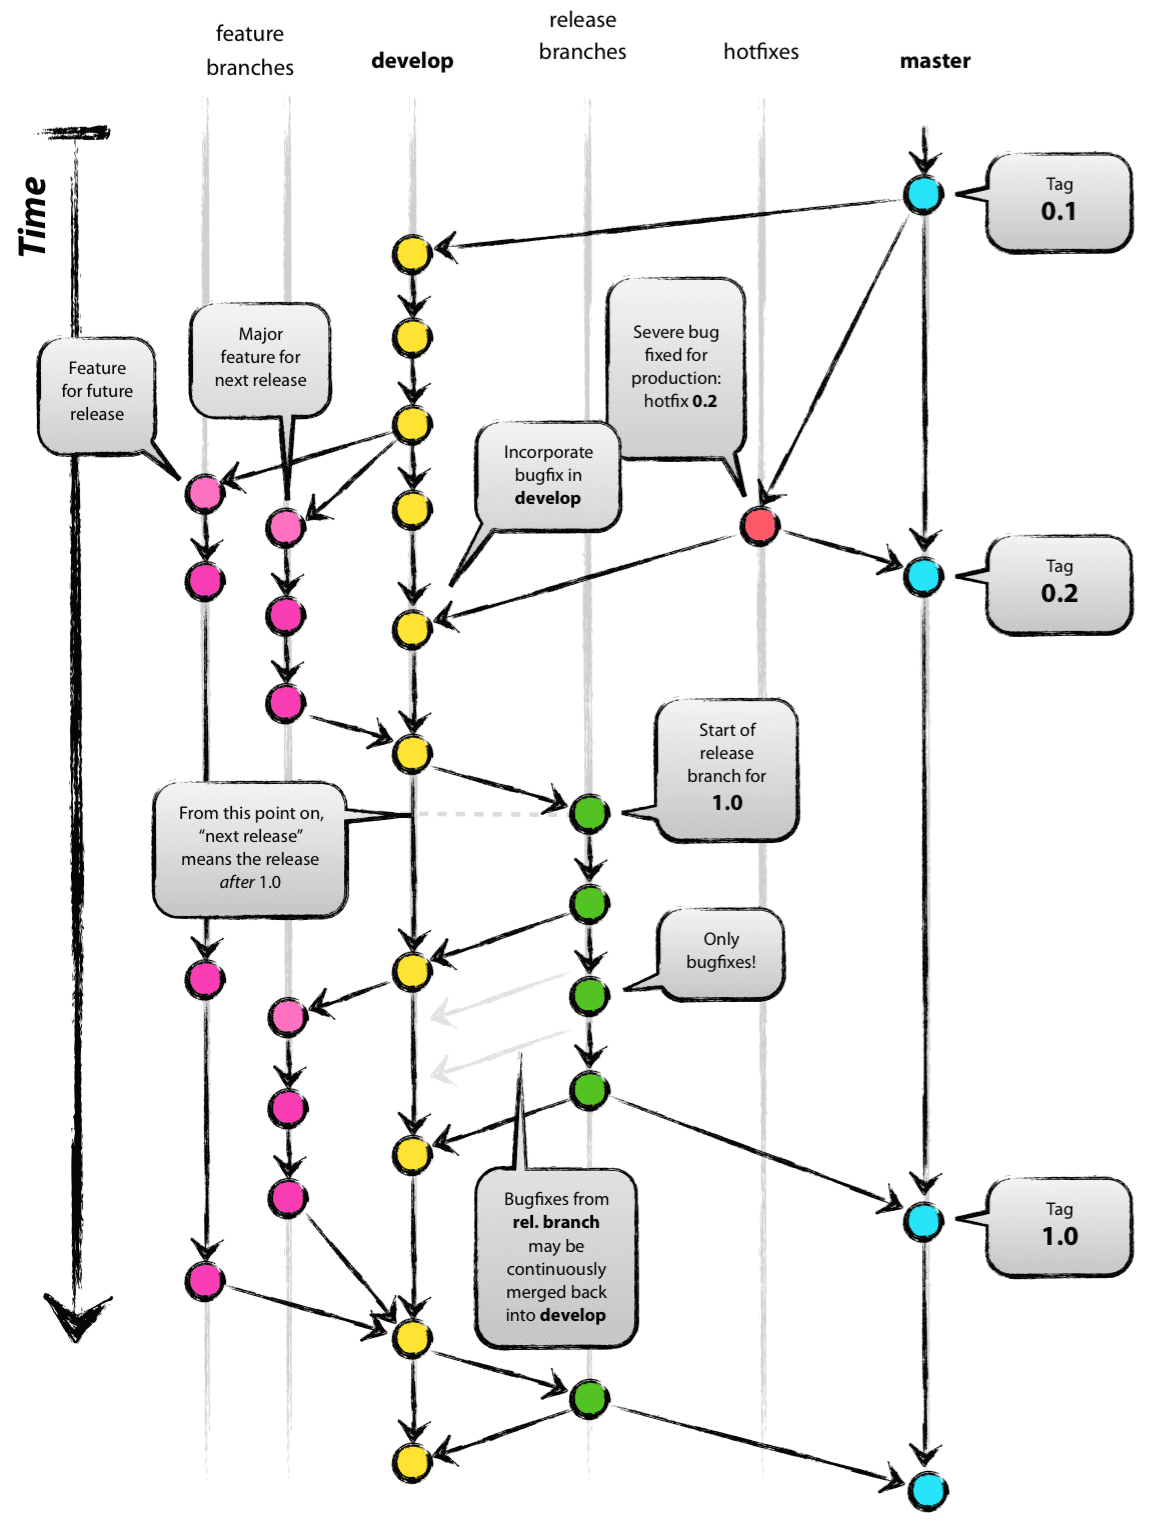


## Note on Merge Conflicts
For the most part, git makes merging changes between branches really simple. However, there are some cases where git will be confused on how to combine two changes, and asks you for help. This is called a merge conflict.

Mostly commonly, this happens when two branches modify the same file.

For example, in this situation, let’s say I deleted a line that Andrew modified on his branch. Git wouldn’t know whether to delete the line or modify it. Here, you need to tell git which change to take, and some tools even allow you to edit the change manually. If it isn’t straightforward, you may have to consult with the developer of the other branch to handle a merge conflict.

You can learn more about merge conflicts and methods to handle them [here](https://help.github.com/en/github/collaborating-with-issues-and-pull-requests/about-merge-conflicts).

## Model Versioning
In the previous example, you may have noticed that each commit was documented with a score for that model. This is one simple way to help you keep track of model versions. Version control in data science can be tricky, because there are many pieces involved that can be hard to track, such as large amounts of data, model versions, seeds, hyperparameters, etc.

Here are some resources for useful ways and tools for managing versions of models and large data. These are here for you to explore, but are not necessary to know now as you start your journey as a data scientist. On the job, you’ll always be learning new skills, and many of them will be specific to the processes set in your company.

[How to Version Control Your Production Machine Learning Models](https://blog.algorithmia.com/how-to-version-control-your-production-machine-learning-models/)
Versioning Data Science

# Welcome To Software Engineering Practices Part II
In part 2 of software engineering practices, you'll learn about the following practices of software engineering and how they apply in data science.

- Testing
- Logging
- Code reviews

## Testing
Testing your code is essential before deployment. It helps you catch errors and faulty conclusions before they make any major impact. Today, employers are looking for data scientists with the skills to properly prepare their code for an industry setting, which includes testing their code.

## Testing And Data Science
- Problems that could occur in data science aren’t always easily detectable; you might have values being encoded incorrectly, features being used inappropriately, unexpected data breaking assumptions
- To catch these errors, you have to check for the quality and accuracy of your analysis in addition to the quality of your code. Proper testing is necessary to avoid unexpected surprises and have confidence in your results.
- **TEST DRIVEN DEVELOPMENT**: a development process where you write tests for tasks before you even write the code to implement those tasks.
- **UNIT TEST**: a type of test that covers a “unit” of code, usually a single function, independently from the rest of the program.
### Resources:
Four Ways Data Science Goes Wrong and How Test Driven Data Analysis Can Help: [Blog Post](https://www.predictiveanalyticsworld.com/machinelearningtimes/four-ways-data-science-goes-wrong-and-how-test-driven-data-analysis-can-help/6947/)

`1. Errors of Implementation. The most basic kind of error is where we just get the program wrong—either in obvious ways like multiplying instead of dividing—or in subtler ways like failing to control an accumulation of numerical errors (e.g. a Patriot Missile failure during the first Gulf War that resulted in more than 100 casualties). The twist with data analysis is that it might be quite hard to detect that the results are wrong, especially if they are voluminous.`

`2. Errors of Interpretation.  Our analysis always depends on the data we consume and produce being correct in two senses: the values must be accurate and they must mean what we think they mean. Even when the first is true, often our misunderstandings and misinterpretations obscure our picture of reality, leading us unknowingly to draw fallacious conclusions.  For example, despite much initial hype Google Flu doesn’t accurately forecast disease outcomes based on search behavior since most people don’t have a good understanding of flu symptoms. Even the questions we ask can be the wrong questions, as Tukey observed:`

`“Far better an approximate answer to the right question, which is often vague, than an exact answer to the wrong question” – J. Tukey, The Future of Statistical Analysis`

`3. Errors of Process.  Applying statistical methods or inferences correctly often require that specific assumptions be satisfied. Data transformations often have unpredictable consequences in the face of unexpected data (missing or duplicate values being a common problem) and can lead to unjustifiable results.  There are several great collections of how statistics are done wrong, and the spectacular failure of the Mars Orbiter due to incompatible units is a canonical illustration of failure due to different units being mixed used without appropriate conversions.`

`4. Errors of Applicability. An ad hoc approach is common during initial data exploration. But this can result in an analytical process that is overly specific to the initial dataset, making it difficult to repeat or apply to updated data with slight differences.  Although this sometimes results in easily detectable “crashes”—such as when an unexpected value appears or is missing—it can also lead to otherwise inappropriate conclusions in production. The best known examples of this are overfitting a training dataset, leading to models that don’t perform well in production (e.g. Walmart’s recommendation engine failure), but even analyses not involving predictive modelling often “wire in” assumptions and values, making the analytical process of limited applicability.`

Ned Batchelder: Getting Started Testing: [Slide Deck](https://speakerdeck.com/pycon2014/getting-started-testing-by-ned-batchelder?slide=23) and [Presentation Video](https://www.youtube.com/watch?v=FxSsnHeWQBY)

## Unit Tests
We want to test our functions in a way that is repeatable and automated. Ideally, we'd run a test program that runs all our unit tests and cleanly lets us know which ones failed and which ones succeeded. Fortunately, there are great tools available in Python that we can use to create effective unit tests!

### Unit Test Advantages and Disadvantages
The advantage of unit tests is that they are isolated from the rest of your program, and thus, no dependencies are involved. They don't require access to databases, APIs, or other external sources of information. However, passing unit tests isn’t always enough to prove that our program is working successfully. To show that all the parts of our program work with each other properly, communicating and transferring data between them correctly, we use integration tests. In this lesson, we'll focus on unit tests; however, when you start building larger programs, you will want to use integration tests as well.

You can read about integration testing and how integration [tests](https://www.fullstackpython.com/integration-testing.html) relate to unit tests here. That article contains other very useful links as well.

## Unit Testing Tools
To install `pytest`, run `pip install -U pytest` in your terminal. You can see more information on getting started here.

- Create a test file starting with test_
- Define unit test functions that start with test_ inside the test file
- Enter `pytest` into your terminal in the directory of your test file and it will detect these tests for you!

`test_` is the default - if you wish to change this, you can learn how to in this `pytest` [configuration](https://docs.pytest.org/en/latest/customize.html)

In the test output, periods represent successful unit tests and F's represent failed unit tests. Since all you see is what test functions failed, it's wise to have only one assert statement per test. Otherwise, you wouldn't know exactly how many tests failed, and which tests failed.

Your tests won't be stopped by failed assert statements, but it will stop if you have syntax errors.

In [ ]:
def days_until_launch(current_day, launch_day):
    """"Returns the days left before launch.
    
    current_day (int) - current day in integer
    launch_day (int) - launch day in integer
    """
    if launch_day < current_day:
        return 0
    else:
        return launch_day - current_day


In [ ]:
from compute_launch import days_until_launch

def test_days_until_launch_4():
    assert(days_until_launch(22, 26) == 4)

def test_days_until_launch_0():
    assert(days_until_launch(253, 253) == 0)

def test_days_until_launch_0_negative():
    assert(days_until_launch(83, 64) == 0)
    
def test_days_until_launch_1():
    assert(days_until_launch(9, 10) == 1)


Then in the termial run `pytest`

## Test Driven Development and Data Science
- **TEST DRIVEN DEVELOPMENT**: writing tests before you write the code that’s being tested. Your test would fail at first, and you’ll know you’ve finished implementing a task when this test passes.
- Tests can check for all the different scenarios and edge cases you can think of, before even starting to write your function. This way, when you do start implementing your function, you can run this test to get immediate feedback on whether it works or not in all the ways you can think of, as you tweak your function.
- When refactoring or adding to your code, tests help you rest assured that the rest of your code didn't break while you were making those changes. Tests also helps ensure that your function behavior is repeatable, regardless of external parameters, such as hardware and time.
Test driven development for data science is relatively new and has a lot of experimentation and breakthroughs appearing, which you can learn more about in the resources below.

Test driven development for data science is relatively new and has a lot of experimentation and breakthroughs appearing, which you can learn more about in the resources below.

- [Data Science TDD](https://www.linkedin.com/pulse/data-science-test-driven-development-sam-savage/)
- [TDD for Data Science](http://engineering.pivotal.io/post/test-driven-development-for-data-science/)
- [TDD is Essential for Good Data Science Here's Why](https://medium.com/uk-hydrographic-office/test-driven-development-is-essential-for-good-data-science-heres-why-db7975a03a44)
- [Testing Your Code](https://docs.python-guide.org/writing/tests/) (general python TDD)

## Logging
Logging is valuable for understanding the events that occur while running your program. For example, if you run your model over night and see that it's producing ridiculous results the next day, log messages can really help you understand more about the context in which this occurred. Lets learn about the qualities that make a log message effective.

## Log Messages
Logging is the process of recording messages to describe events that have occurred while running your software. Let's take a look at a few examples, and learn tips for writing good log messages.
### Tip: Be professional and clear
`Bad: Hmmm... this isn't working???
Bad: idk.... :(
Good: Couldn't parse file.`
### Tip: Be concise and use normal capitalization
`Bad: Start Product Recommendation Process
Bad: We have completed the steps necessary and will now proceed with the recommendation process for the records in our product database.
Good: Generating product recommendations.`
### Tip: Choose the appropriate level for logging
`DEBUG - level you would use for anything that happens in the program.
ERROR - level to record any error that occurs
INFO - level to record all actions that are user-driven or system specific, such as regularly scheduled operations`
### Tip: Provide any useful information
`Bad: Failed to read location data
Good: Failed to read location data: store_id 8324971`

## Code Reviews
Code reviews benefit everyone in a team to promote best programming practices and prepare code for production. Let's go over what to look for in a code review and some tips on how to conduct one.

[Code Review](https://github.com/lyst/MakingLyst/tree/master/code-reviews)

[Code Review Best Practices](https://www.kevinlondon.com/2015/05/05/code-review-best-practices.html)

## Questions to Ask Yourself When Conducting a Code Review
First, let's look over some of the questions we may ask ourselves while reviewing code. These are simply from the concepts we've covered in these last two lessons!

#### Is the code clean and modular?
- Can I understand the code easily?
- Does it use meaningful names and whitespace?
- Is there duplicated code?
- Can you provide another layer of abstraction?
- Is each function and module necessary?
- Is each function or module too long?

#### Is the code efficient?
- Are there loops or other steps we can vectorize?
- Can we use better data structures to optimize any steps?
- Can we shorten the number of calculations needed for any steps?
- Can we use generators or multiprocessing to optimize any steps?

#### Is documentation effective?
- Are in-line comments concise and meaningful?
- Is there complex code that's missing documentation?
- Do function use effective docstrings?
- Is the necessary project documentation provided?

#### Is the code well tested?
- Does the code high test coverage?
- Do tests check for interesting cases?
- Are the tests readable?
- Can the tests be made more efficient?

#### Is the logging effective?
- Are log messages clear, concise, and professional?
- Do they include all relevant and useful information?
- Do they use the appropriate logging level?

## Tips for Conducting a Code Review
Now that we know what we are looking for, let's go over some tips on how to actually write your code review. When your coworker finishes up some code that they want to merge to the team's code base, they might send it to you for review. You provide feedback and suggestions, and then they may make changes and send it back to you. When you are happy with the code, you approve and it gets merged to the team's code base.

As you may have noticed, with code reviews you are now dealing with people, not just computers. So it's important to be thoughtful of their ideas and efforts. You are in a team and there will be differences in preferences. The goal of code review isn't to make all code follow your personal preferences, but a standard of quality for the whole team.

#### Tip: Use a code linter
This isn't really a tip for code review, but can save you lots of time from code review! Using a Python code linter like [pylint](https://www.pylint.org/) can automatically check for coding standards and PEP 8 guidelines for you! It's also a good idea to agree on a style guide as a team to handle disagreements on code style, whether that's an existing style guide or one you create together incrementally as a team.

#### Tip: Explain issues and make suggestions
Rather than commanding people to change their code a specific way because it's better, it will go a long way to explain to them the consequences of the current code and suggest changes to improve it. They will be much more receptive to your feedback if they understand your thought process and are accepting recommendations, rather than following commands. They also may have done it a certain way intentionally, and framing it as a suggestion promotes a constructive discussion, rather than opposition.

`BAD: Make model evaluation code its own module - too repetitive.`

`BETTER: Make the model evaluation code its own module. This will simplify models.py to be less repetitive and focus primarily on building models.`

`GOOD: How about we consider making the model evaluation code its own module? This would simplify models.py to only include code for building models. Organizing these evaluations methods into separate functions would also allow us to reuse them with different models without repeating code.`

### Tip: Keep your comments objective
Try to avoid using the words "I" and "you" in your comments. You want to avoid comments that sound personal to bring the attention of the review to the code and not to themselves.

`BAD: I wouldn't groupby genre twice like you did here... Just compute it once and use that for your aggregations.`

`BAD: You create this groupby dataframe twice here. Just compute it once, save it as groupby_genre and then use that to get your average prices and views.`

`GOOD: Can we group by genre at the beginning of the function and then save that as a groupby object? We could then reference that object to get the average prices and views without computing groupby twice.`

### Tip: Provide code examples
When providing a code review, you can save the author time and make it easy for them to act on your feedback by writing out your code suggestions. This shows you are willing to spend some extra time to review their code and help them out. It can also just be much quicker for you to demonstrate concepts through code rather than explanations.

Let's say you were reviewing code that included the following lines:

`first_names = []
last_names = []`

`for name in enumerate(df.name):
    first, last = name.split(' ')
    first_names.append(first)
    last_names.append(last)`

`df['first_name'] = first_names
df['last_names'] = last_names`


`BAD: You can do this all in one step by using the pandas str.split method.`

`GOOD: We can actually simplify this step to the line below using the pandas str.split method. Found this on this stack overflow post: https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns`

`df['first_name'], df['last_name'] = df['name'].str.split(' ', 1).str`